In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

def set_style():
    # This sets reasonable defaults for font size for
    # a figure that will go in a paper
    sns.set_context("paper", font_scale=3)
    # Set the font to be serif, rather than sans
    sns.set(font="serif")
    # Make the background white, and specify the
    # specific font family
    sns.set_style(
        "white",
        {"font.family": "serif", "font.serif": ["Times", "Palatino", "serif"]},
    )
    sns.set_style("ticks")
    sns.set_style("whitegrid")


Text(0, 0.5, 'Time[ms]')

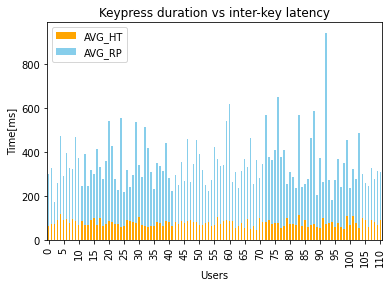

In [13]:

df = pd.read_csv("sapipin_to_clustering_111.csv")
# df.describe()
 
df = df[['AVG_HT', 'AVG_RP']]
ax = df.plot(kind='bar', stacked=True, color=['orange', 'skyblue'])
ax.set_xticks(ax.get_xticks()[::5])
# Add Title and Labels
plt.title('Keypress duration vs inter-key latency')
plt.xlabel('Users')
plt.ylabel('Time[ms]')

Text(0, 0.5, 'AVG(RP)/AVG(HT)')

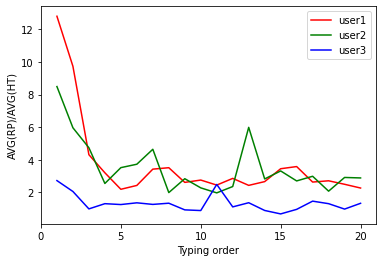

In [35]:
df = pd.read_csv("sapipin_no_outliers_avgs.csv")
df = df[['AVG_RP_AVG_HT_RATIO', 'user']]

df_user1 = df[df['user'].isin([1])]
df_user2 = df[df['user'].isin([2])]
df_user3 = df[df['user'].isin([3])]

x_range = [i for i in range(1,21)]
sns.lineplot(data=df_user1, x=x_range, y = 'AVG_RP_AVG_HT_RATIO', color='red')
sns.lineplot(data=df_user2, x=x_range, y = 'AVG_RP_AVG_HT_RATIO', color='green')
ax = sns.lineplot(data=df_user3, x=x_range, y = 'AVG_RP_AVG_HT_RATIO', color='blue')
ax.set_xticks(ax.get_xticks()[::2])
plt.legend(labels=["user1", "user2", "user3"])
plt.xlabel('Typing order')
plt.ylabel('AVG(RP)/AVG(HT)')
